In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [56]:
df = pd.read_csv('Exam_Score_Prediction.csv')

In [57]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [59]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


# categorize table

In [103]:
df['results'] = df['exam_score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

In [104]:
df['class_attendance_category'] = df['class_attendance'].apply(lambda x: '>50%' if x >= 60 else '<50%')

In [105]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,...,results,class_attendance_category,age_zscore,study_hours_zscore,class_attendance_zscore,sleep_hours_zscore,exam_score_zscore,group_mean,residual,is_pass
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,...,Fail,>50%,-1.520442,-0.531832,1.324086,0.225999,-0.191095,62.330633,-3.430633,False
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,...,Fail,>50%,1.106067,-0.276227,-0.301899,-1.390586,-0.407934,62.524078,-7.724078,False
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,...,Pass,>50%,0.668315,1.677629,0.392472,0.861085,1.469576,62.718993,27.581007,True
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,...,Fail,<50%,-0.207188,-1.445942,-1.250872,-0.697764,-1.735413,62.330633,-32.630633,False
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,...,Fail,>50%,-0.207188,-1.350632,0.091578,1.611643,-0.994987,62.330633,-18.630633,False


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 20000 non-null  int64  
 1   age                        20000 non-null  int64  
 2   gender                     20000 non-null  object 
 3   course                     20000 non-null  object 
 4   study_hours                20000 non-null  float64
 5   class_attendance           20000 non-null  float64
 6   internet_access            20000 non-null  object 
 7   sleep_hours                20000 non-null  float64
 8   sleep_quality              20000 non-null  object 
 9   study_method               20000 non-null  object 
 10  facility_rating            20000 non-null  object 
 11  exam_difficulty            20000 non-null  object 
 12  exam_score                 20000 non-null  float64
 13  results                    20000 non-null  obj

# Variable

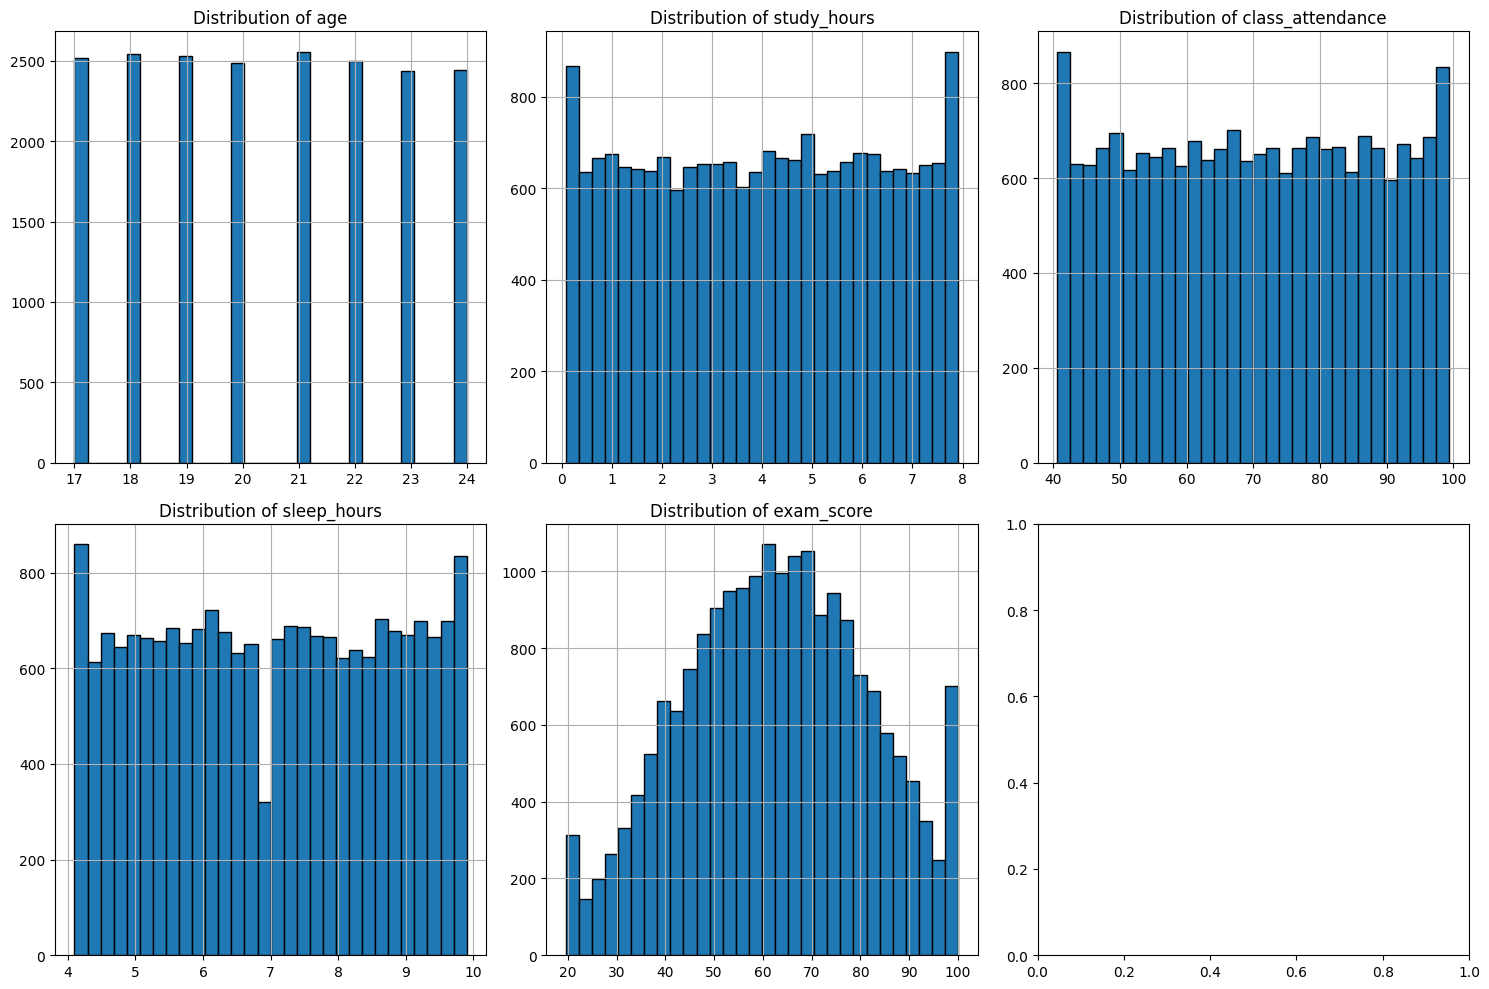

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numeric_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
for idx, col in enumerate(numeric_cols):
    ax = axes[idx//3, idx%3]
    df[col].hist(bins=30, ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


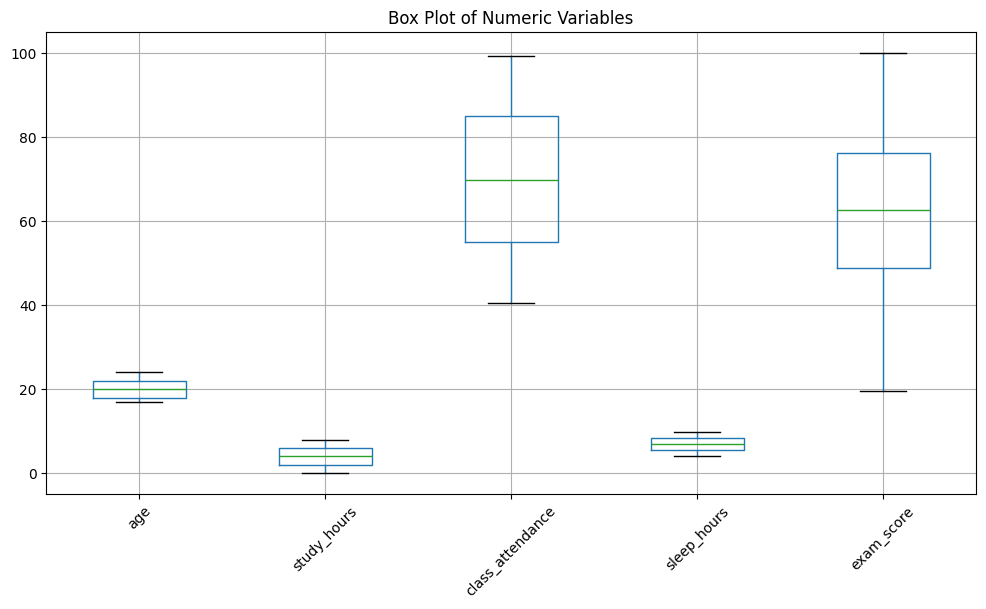

In [108]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title('Box Plot of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

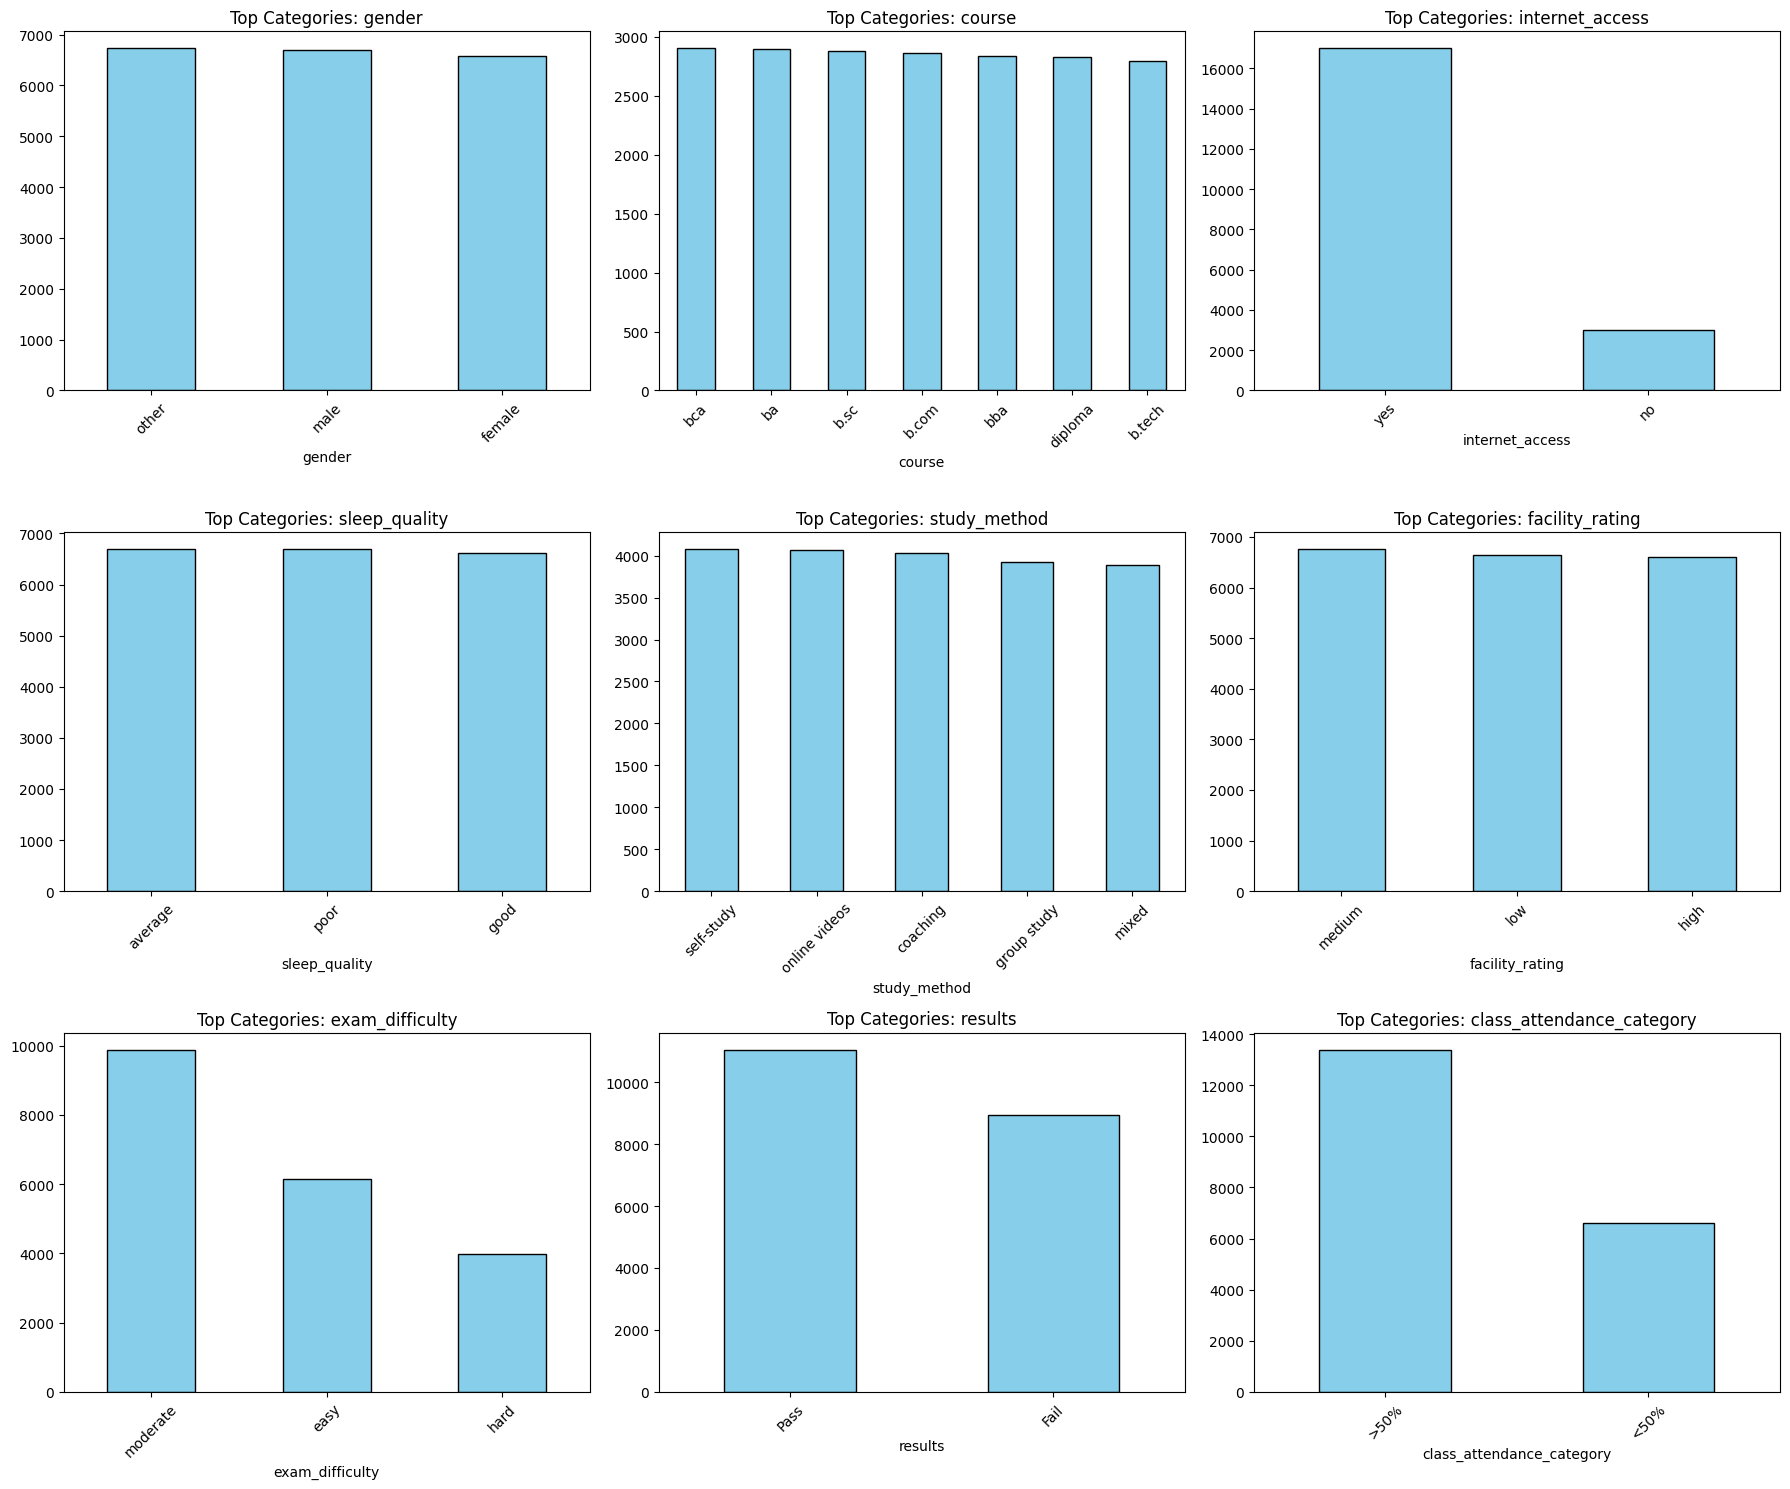

In [ ]:
# Bar plots for top categories
categorical_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 
                    'study_method', 'facility_rating', 'exam_difficulty', 
                    'results', 'class_attendance_category']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for idx, col in enumerate(categorical_cols[:9]):  
    ax = axes[idx//3, idx%3]
    df[col].value_counts().head(10).plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Top Categories: {col}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

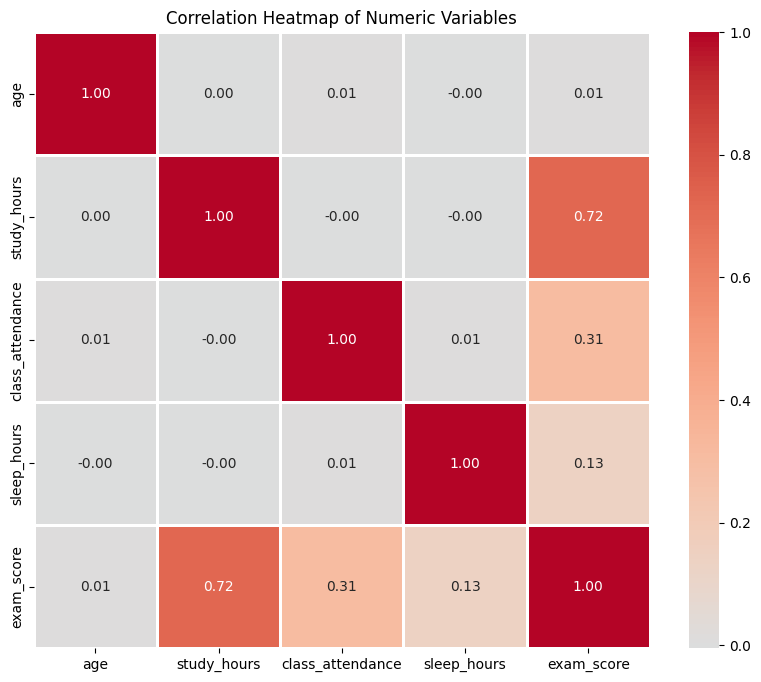

In [110]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

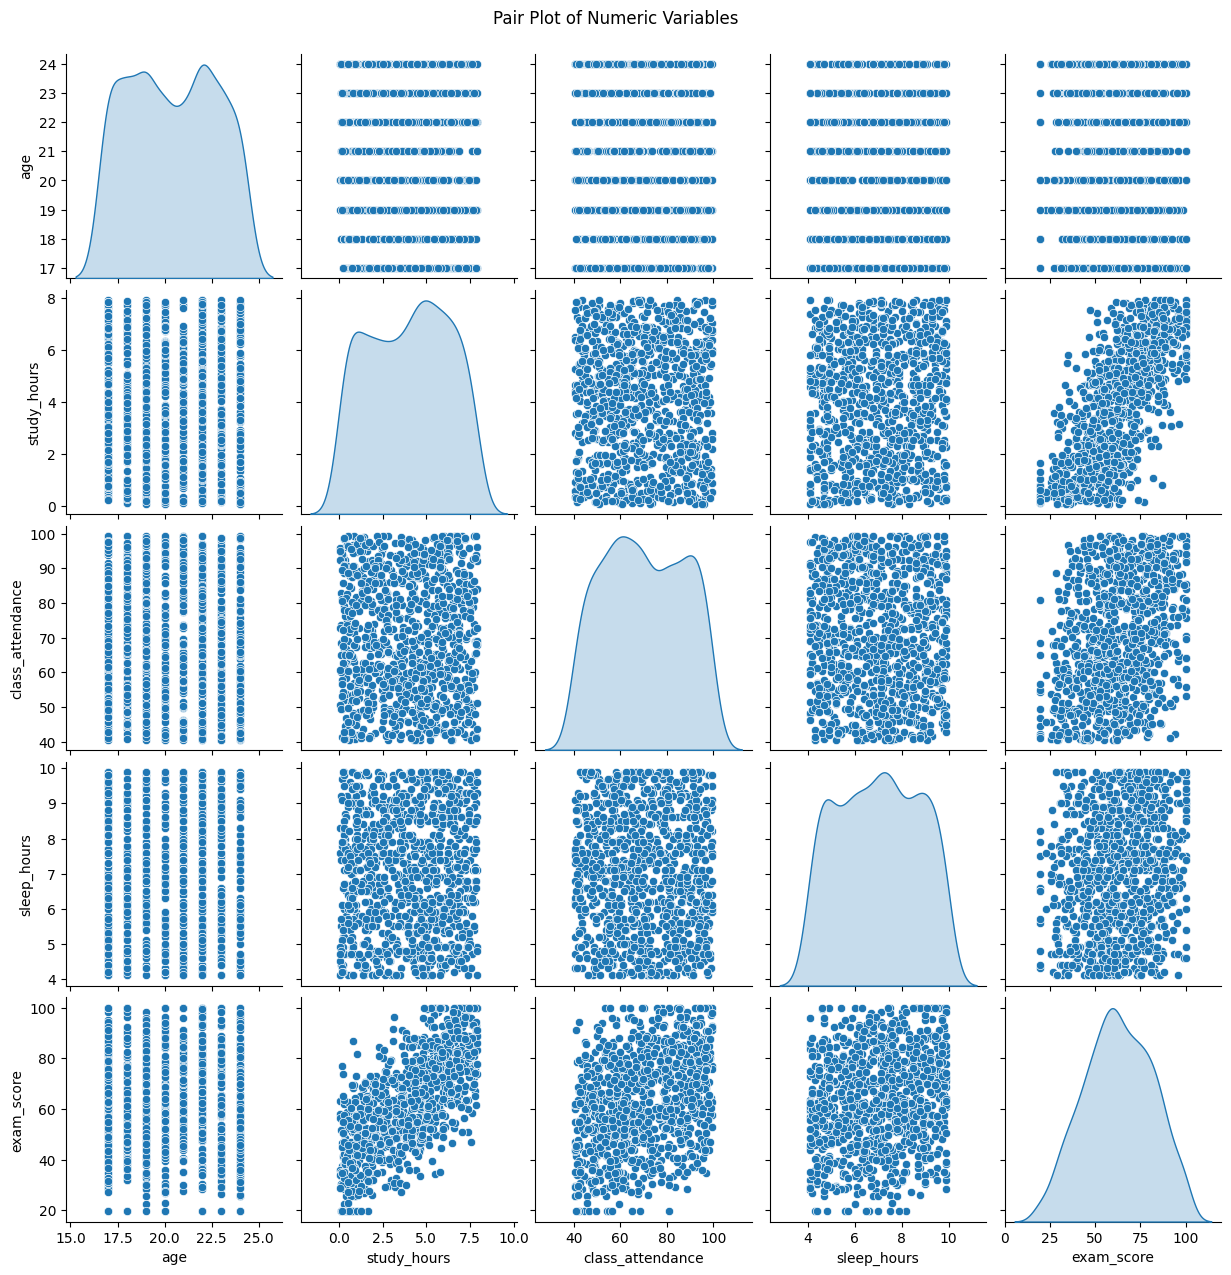

In [111]:
# Scatter matrix (pair plot) - sample if dfset is large
sample_df = df.sample(1000)  # Take sample for readability
sns.pairplot(sample_df[numeric_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

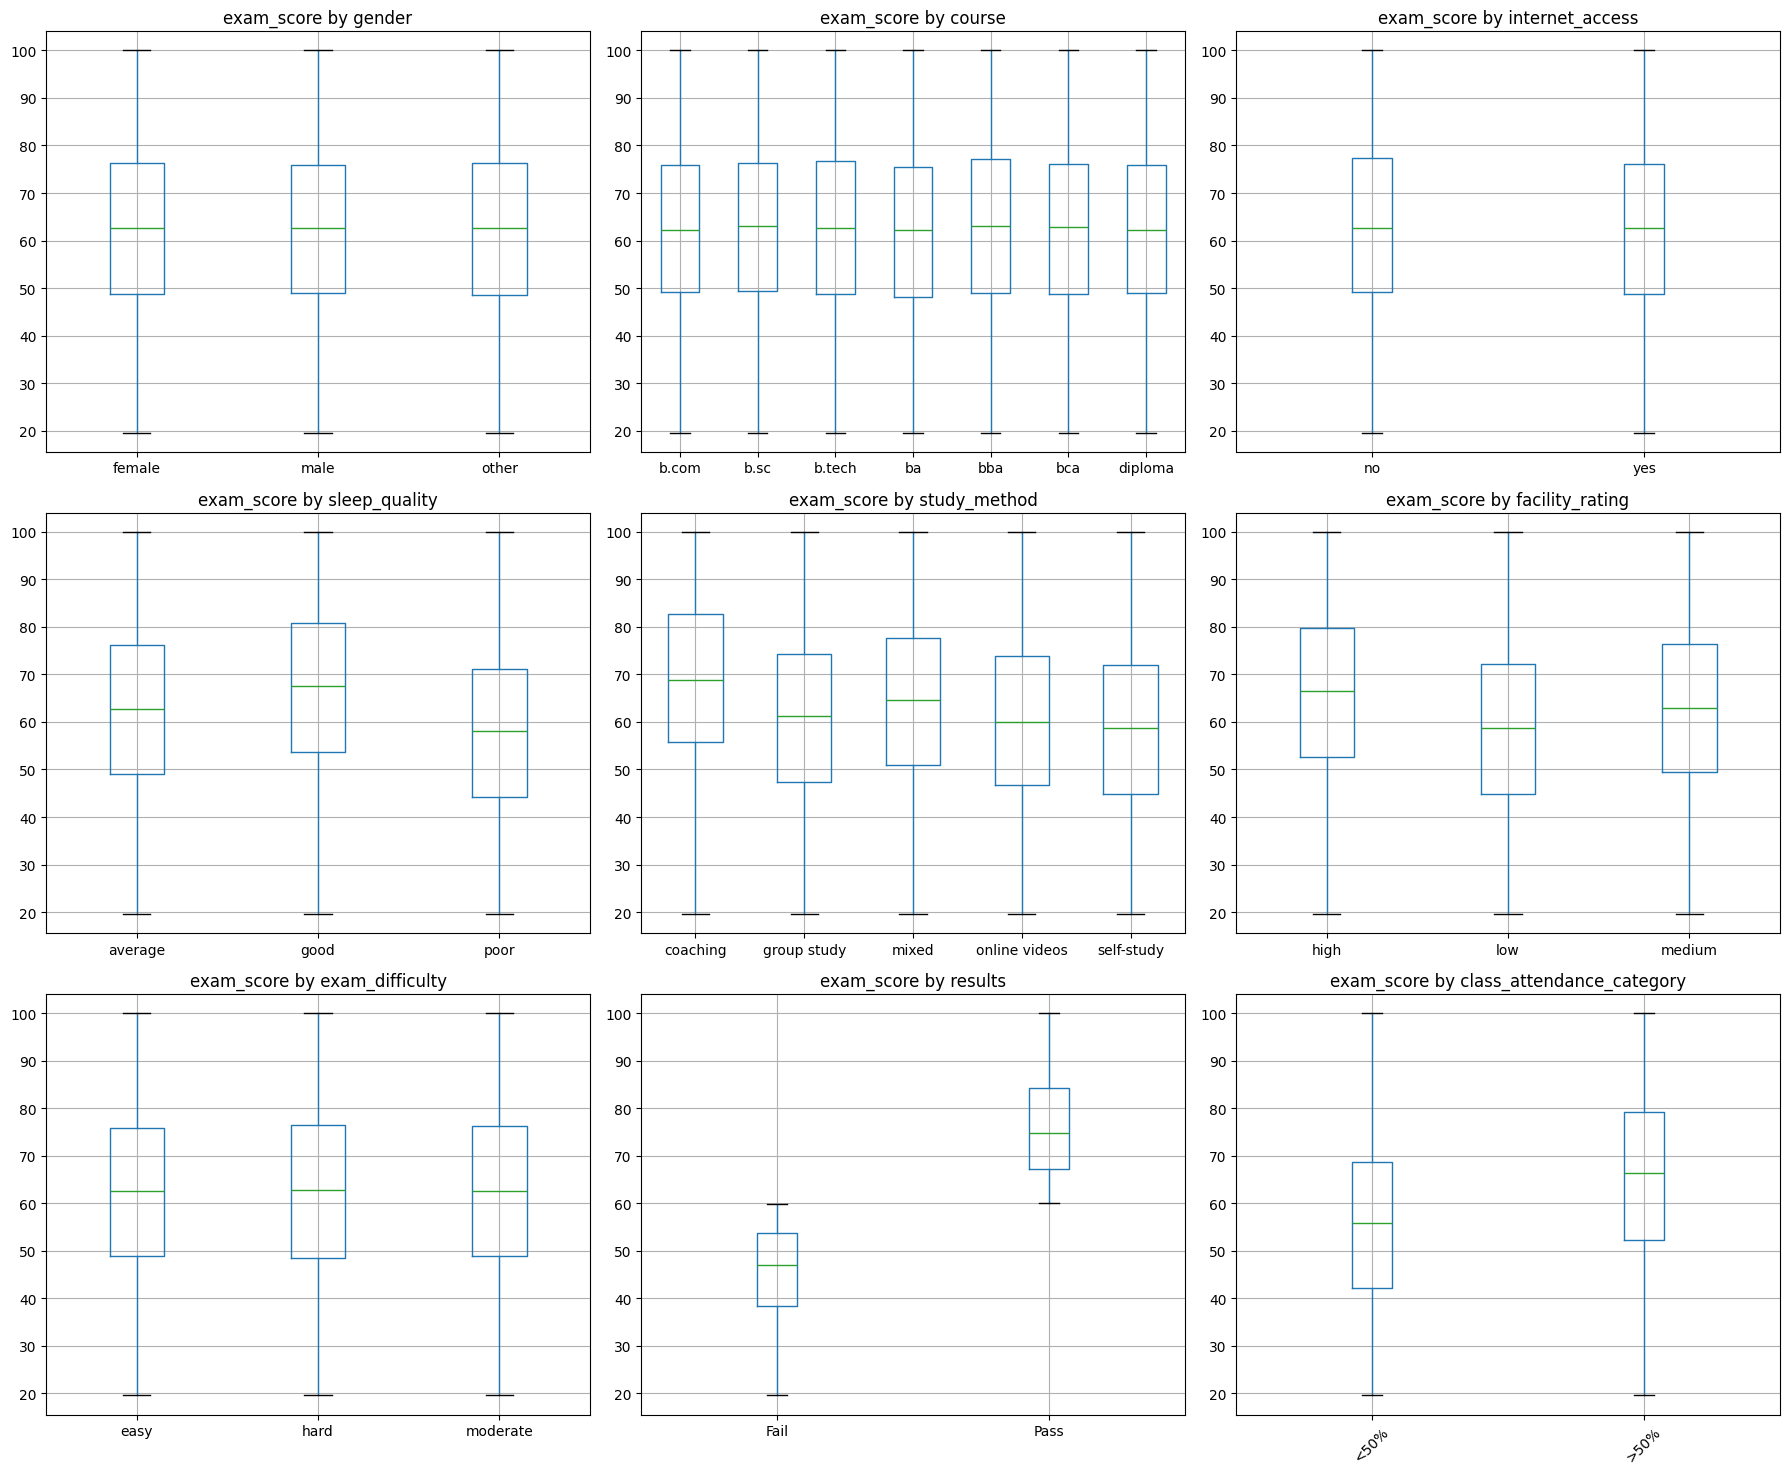

In [ ]:
# Box plots by category (example: exam_score by gender)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for idx, cat_col in enumerate(categorical_cols[:9]): 
    ax = axes[idx//3, idx%3]
    df.boxplot(column='exam_score', by=cat_col, ax=ax)
    ax.set_title(f'exam_score by {cat_col}')
    ax.set_xlabel('')
    plt.xticks(rotation=45)
plt.suptitle('') 
plt.tight_layout()
plt.show()

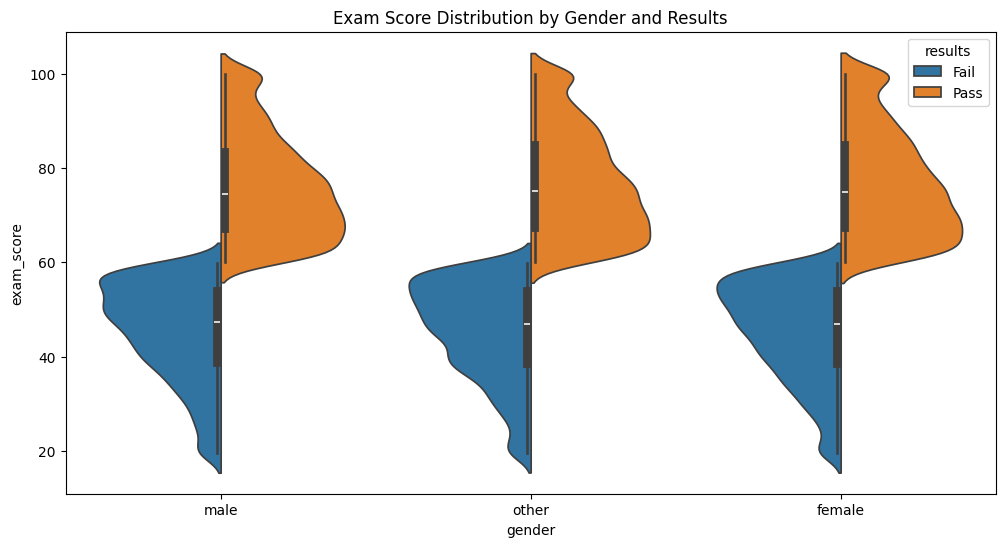

In [113]:
# Violin plots (distribution comparison)
plt.figure(figsize=(12, 6))
sns.violinplot(x='gender', y='exam_score', hue='results', data=df, split=True)
plt.title('Exam Score Distribution by Gender and Results')
plt.show()

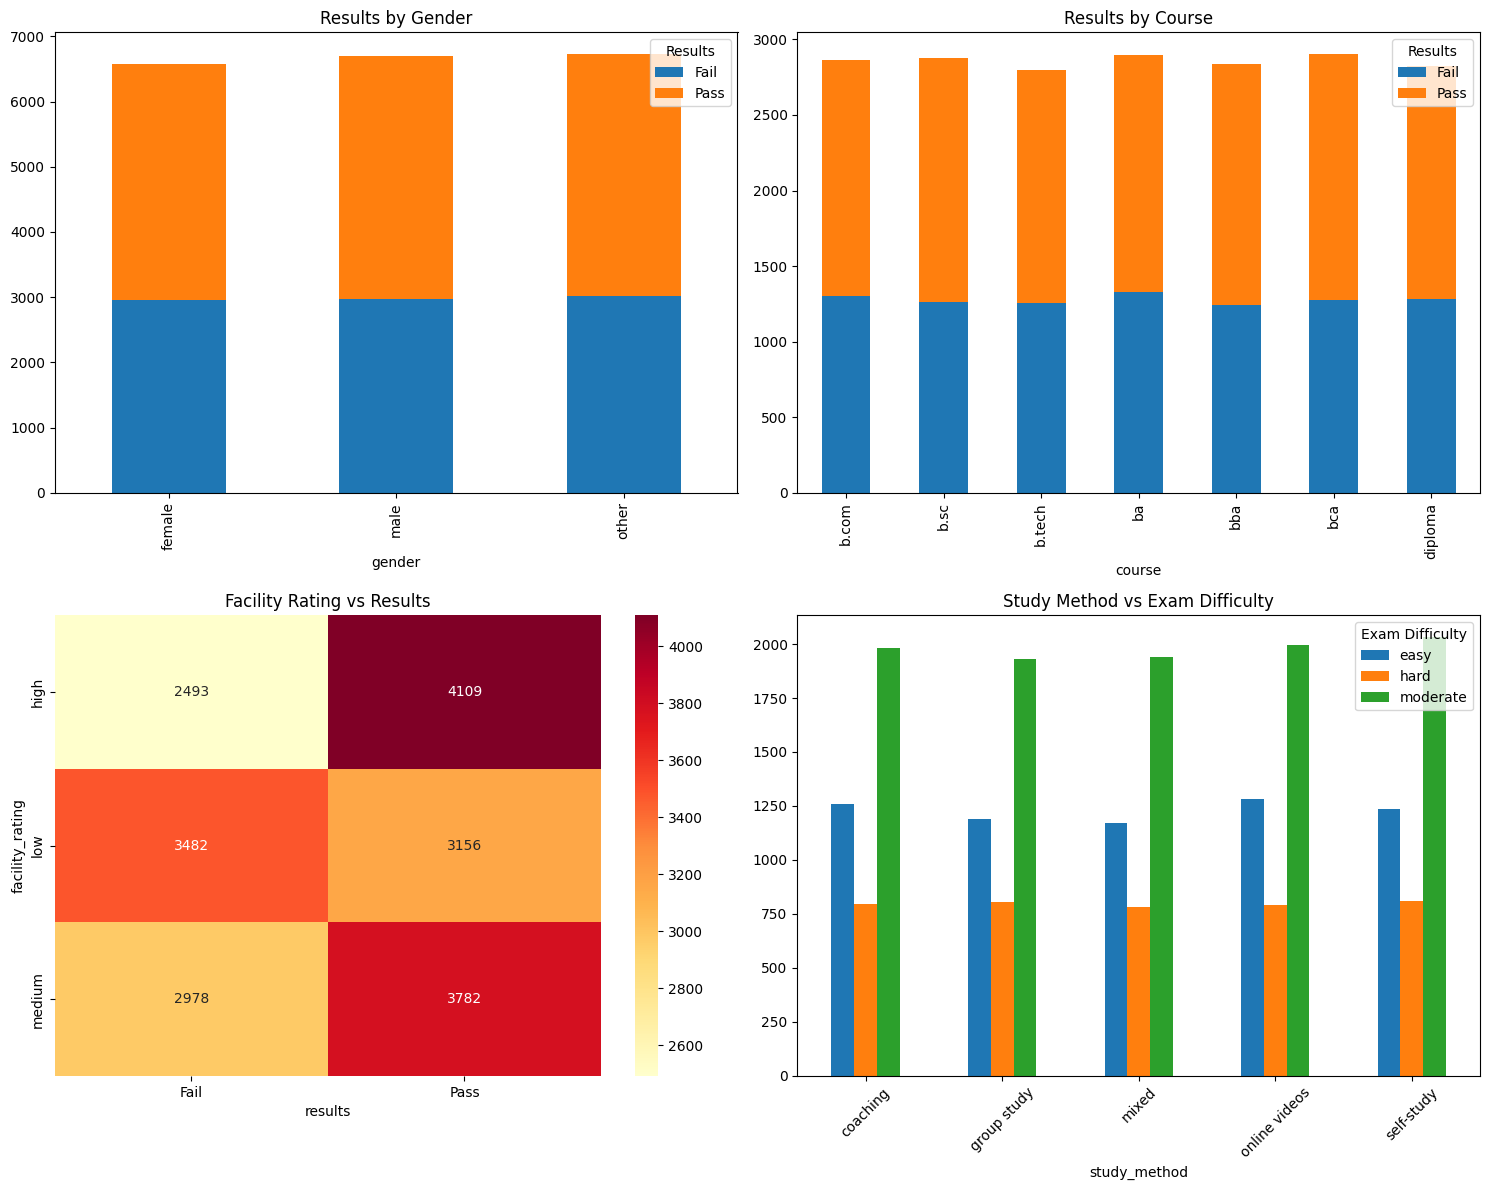

In [114]:
# Stacked bar charts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Gender vs Results
pd.crosstab(df['gender'], df['results']).plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Results by Gender')
axes[0,0].legend(title='Results')

# 2. Course vs Results
pd.crosstab(df['course'], df['results']).plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Results by Course')
axes[0,1].legend(title='Results')
plt.xticks(rotation=45)

# 3. Heatmap for two categorical variables
crosstab = pd.crosstab(df['facility_rating'], df['results'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1,0])
axes[1,0].set_title('Facility Rating vs Results')

# 4. Study method vs exam difficulty
pd.crosstab(df['study_method'], df['exam_difficulty']).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Study Method vs Exam Difficulty')
axes[1,1].legend(title='Exam Difficulty')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

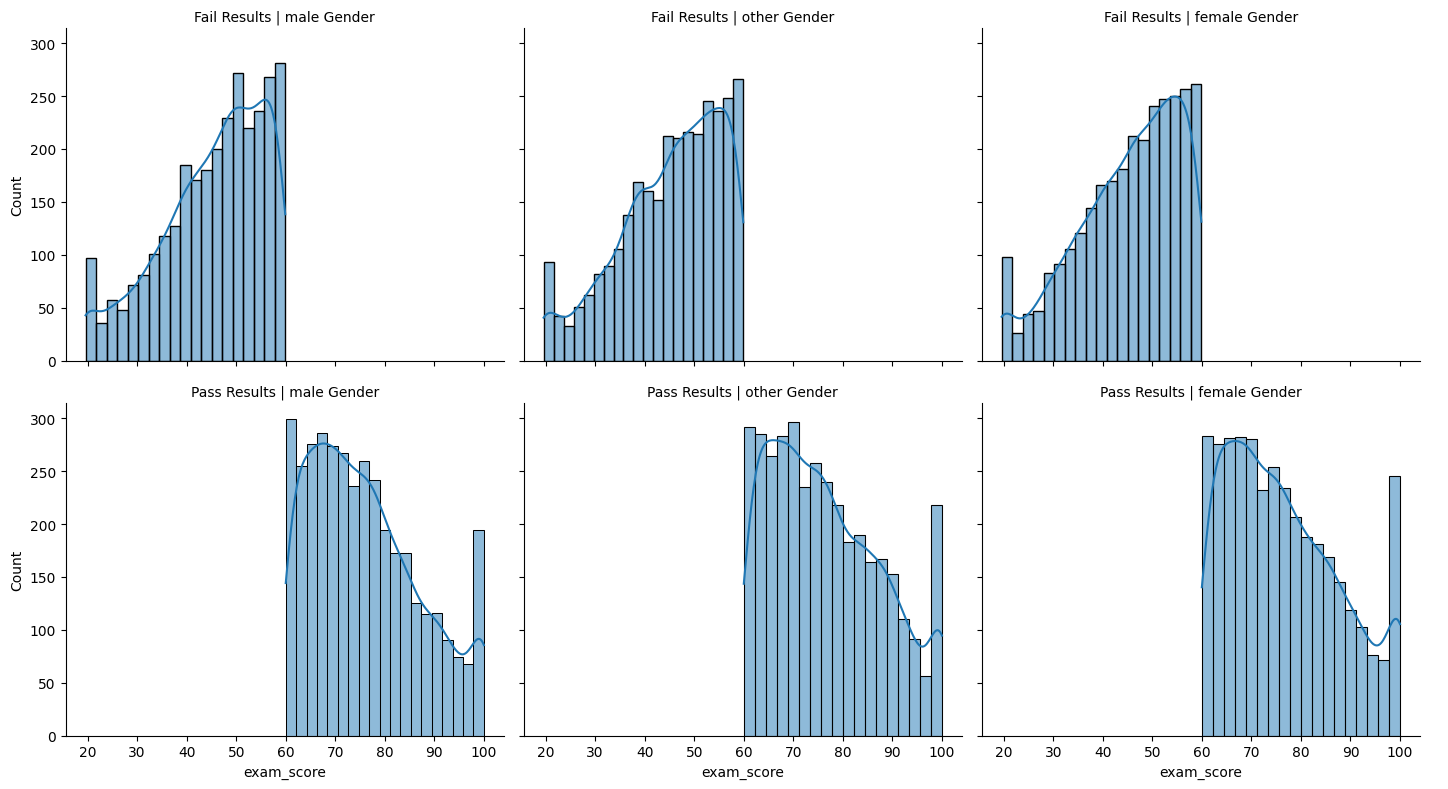

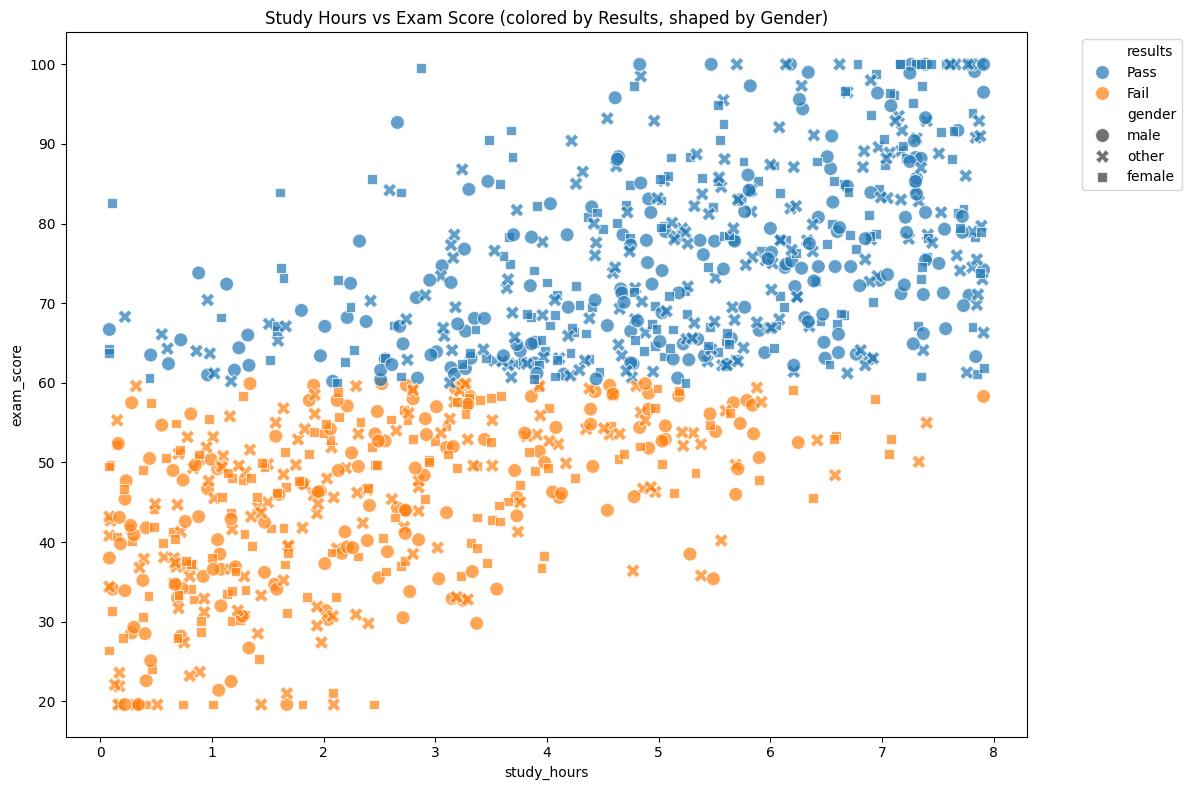

In [115]:
# Facet grid: exam_score distribution by multiple categories
g = sns.FacetGrid(df, col='gender', row='results', height=4, aspect=1.2)
g.map(sns.histplot, 'exam_score', kde=True)
g.set_titles(col_template="{col_name} Gender", row_template="{row_name} Results")
g.add_legend()
plt.show()

# Scatter plot with hue and style
sample_df = df.sample(1000)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_df, x='study_hours', y='exam_score', 
                hue='results', style='gender', s=100, alpha=0.7)
plt.title('Study Hours vs Exam Score (colored by Results, shaped by Gender)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Z scores

In [ ]:
z_scores_scipy = pd.DataFrame(index=df.index)
for col in numeric_cols:
    z_scores_scipy[f'{col}_z'] = stats.zscore(df[col], nan_policy='omit')

print(z_scores_scipy.head())
print(z_scores_scipy.max())
print(z_scores_scipy.min())

      age_z  study_hours_z  class_attendance_z  sleep_hours_z  exam_score_z
0 -1.520442      -0.531832            1.324086       0.225999     -0.191095
1  1.106067      -0.276227           -0.301899      -1.390586     -0.407934
2  0.668315       1.677629            0.392472       0.861085      1.469576
3 -0.207188      -1.445942           -1.250872      -0.697764     -1.735413
4 -0.207188      -1.350632            0.091578       1.611643     -0.994987
age_z                 1.543818
study_hours_z         1.690626
class_attendance_z    1.700204
sleep_hours_z         1.669378
exam_score_z          1.982586
dtype: float64
age_z                -1.520442
study_hours_z        -1.701546
class_attendance_z   -1.702214
sleep_hours_z        -1.679262
exam_score_z         -2.269631
dtype: float64


In [117]:
# Add Z-scores to original dfFrame
for col in numeric_cols:
    df[f'{col}_zscore'] = stats.zscore(df[col])
    
print(df.head())

   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method  ... results  \
0             yes          7.4          poor       coaching  ...    Fail   
1             yes          4.6       average  online videos  ...    Fail   
2             yes          8.5          poor       coaching  ...    Pass   
3             yes          5.8       average  online videos  ...    Fail   
4             yes          9.8          poor       coaching  ...    Fail   

  class_attendance_category  age_zscore study_hours_zscore  \
0                      >50%   -1.520442          -0.531832  

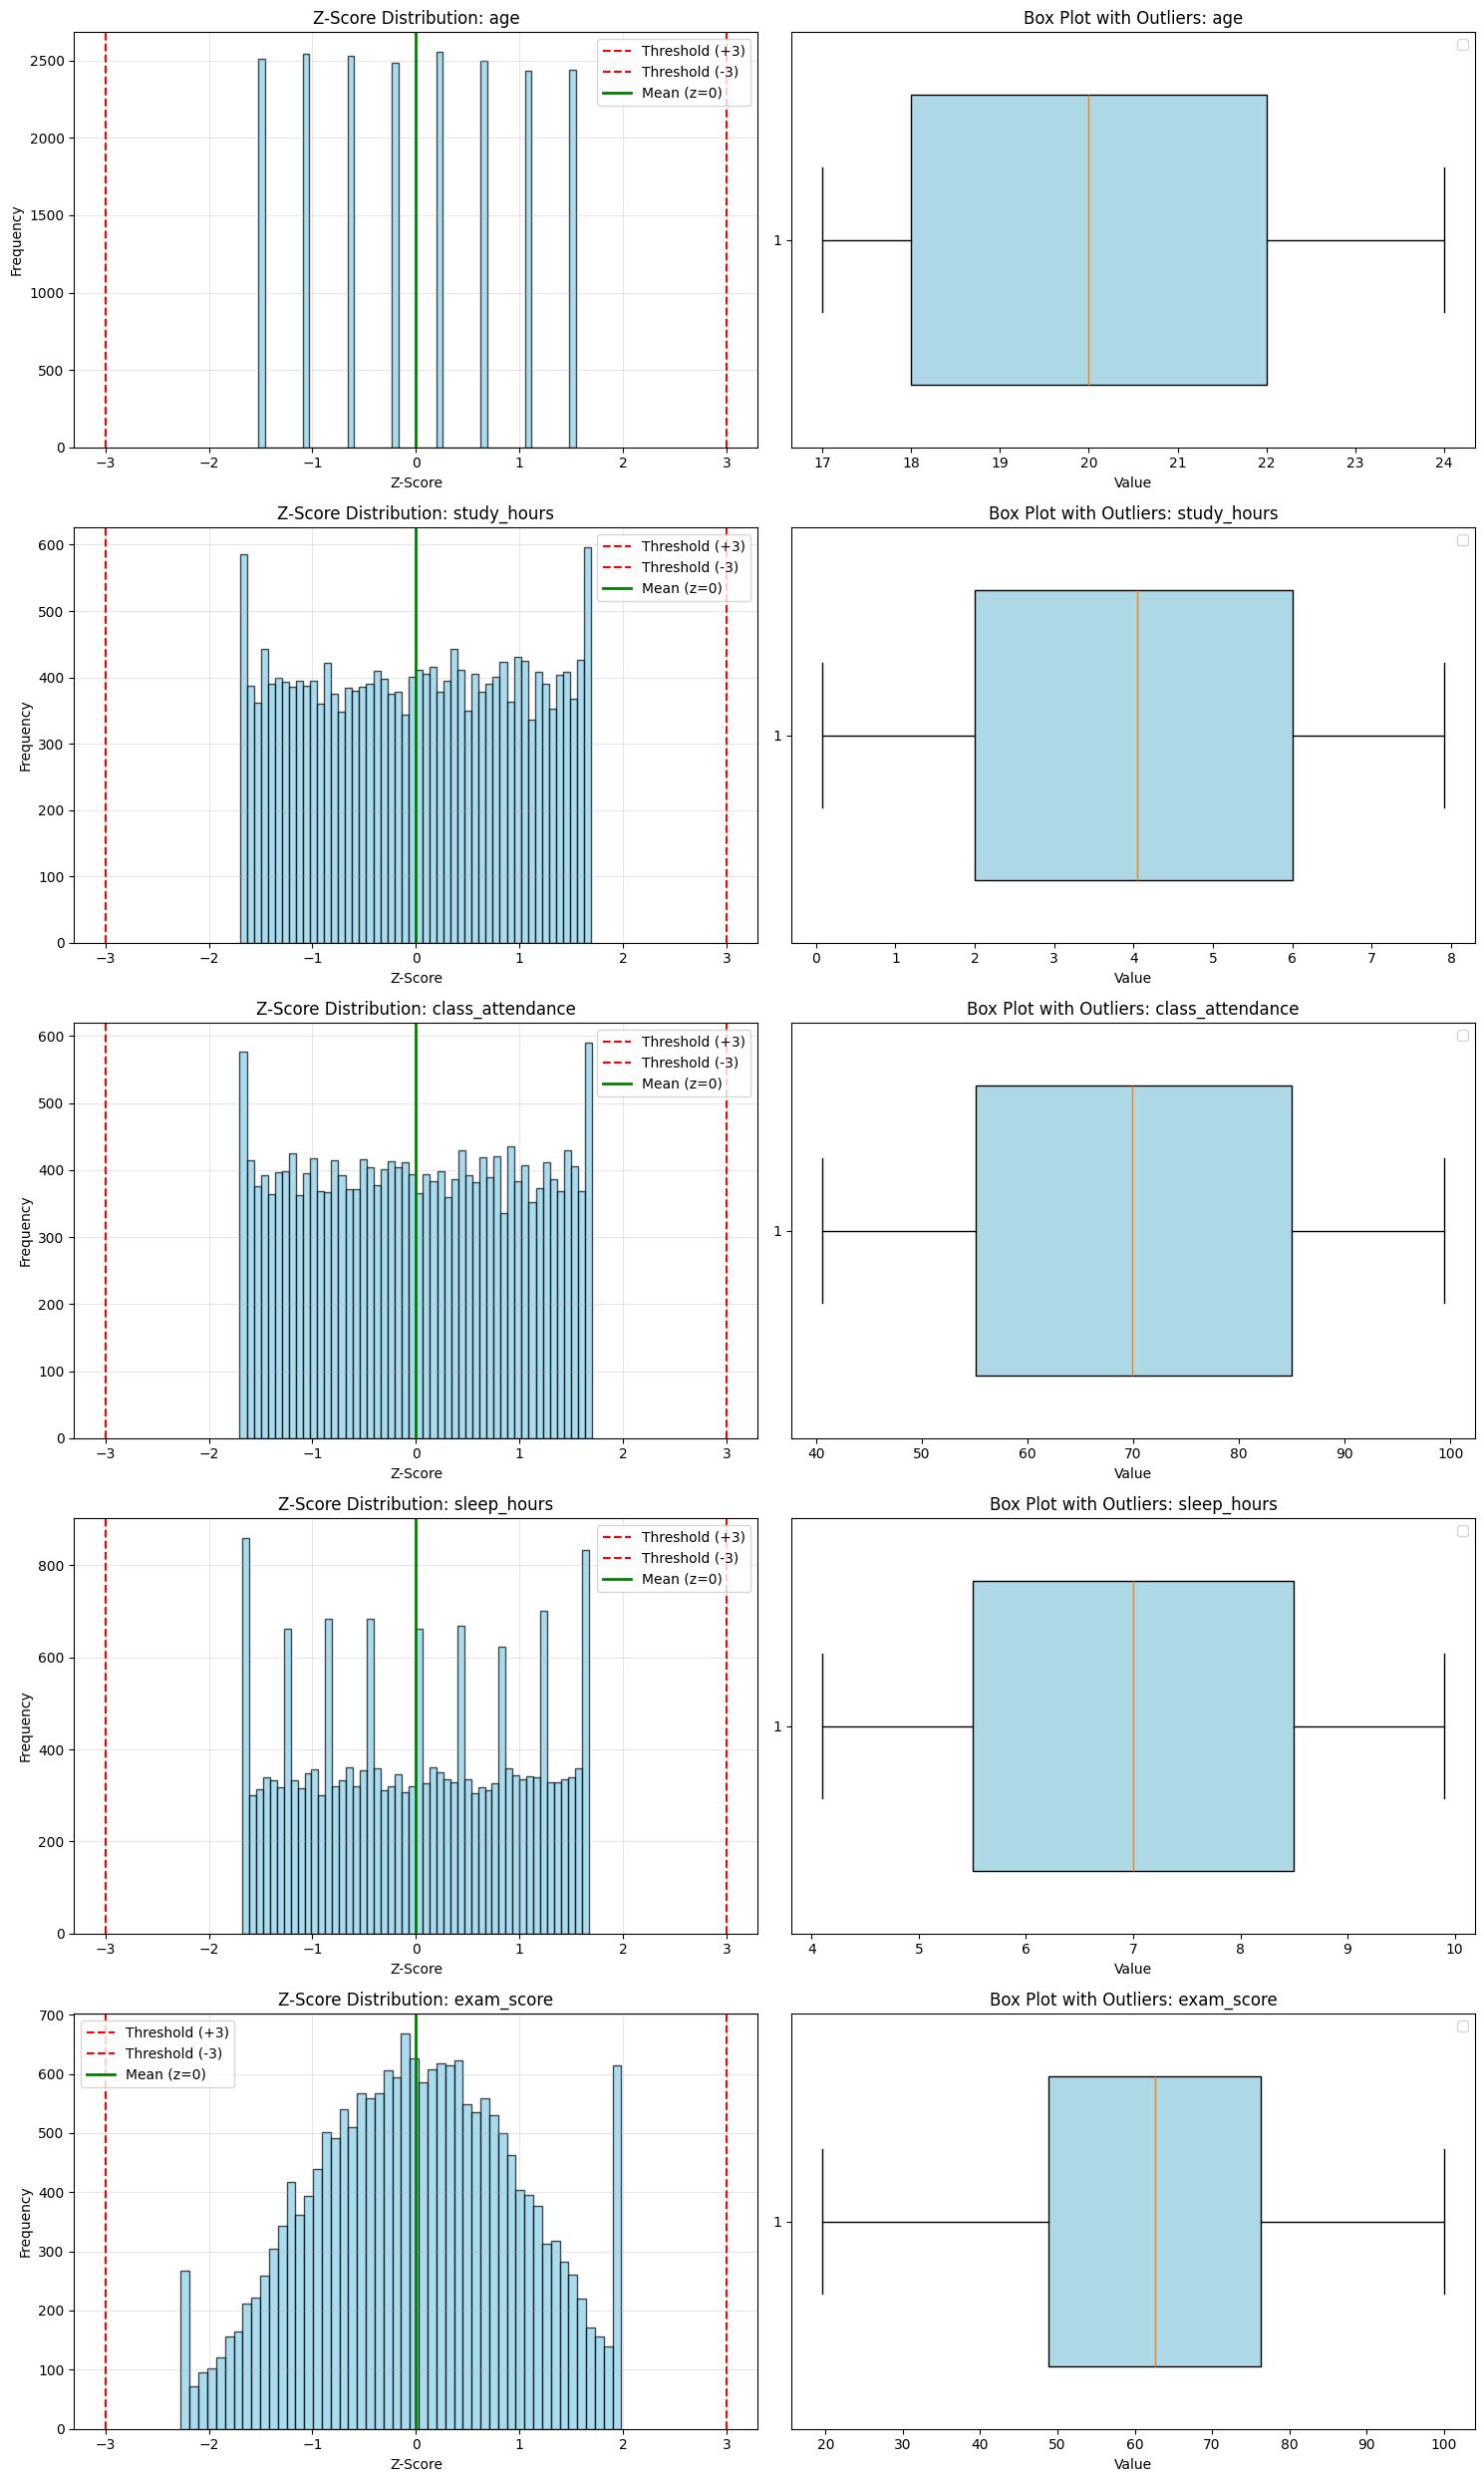

In [118]:
def plot_zscore_distribution(df, columns, threshold=3):
    """
    Plot distribution of Z-scores for multiple columns
    """
    fig, axes = plt.subplots(len(columns), 2, figsize=(15, 5*len(columns)))
    
    if len(columns) == 1:
        axes = np.array([axes]).reshape(1, -1)
    
    for idx, col in enumerate(columns):
        # Calculate z-scores
        z_scores = stats.zscore(df[col])
        
        # Plot 1: Histogram of z-scores
        ax1 = axes[idx, 0]
        ax1.hist(z_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        ax1.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold (+{threshold})')
        ax1.axvline(x=-threshold, color='red', linestyle='--', label=f'Threshold (-{threshold})')
        ax1.axvline(x=0, color='green', linestyle='-', label='Mean (z=0)', linewidth=2)
        ax1.set_xlabel('Z-Score')
        ax1.set_ylabel('Frequency')
        ax1.set_title(f'Z-Score Distribution: {col}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Box plot of original df with outliers highlighted
        ax2 = axes[idx, 1]
        outliers = np.abs(z_scores) > threshold
        
        # Create box plot
        bp = ax2.boxplot(df[col], vert=False, widths=0.7, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        
        # Mark outliers in red
        outlier_values = df[col][outliers]
        if len(outlier_values) > 0:
            ax2.scatter(outlier_values, np.ones(len(outlier_values)), 
                       color='red', s=50, alpha=0.6, label=f'Outliers (|z|>{threshold})')
        
        ax2.set_xlabel('Value')
        ax2.set_title(f'Box Plot with Outliers: {col}')
        ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for all numeric columns
plot_zscore_distribution(df, numeric_cols, threshold=3)

# Hipotesis test

In [76]:
from scipy.stats import ttest_ind, ttest_rel, f_oneway, chi2_contingency, pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [77]:
def one_sample_ttest(df, column, test_value, alternative='two-sided'):
    """
    One sample t-test: Compare sample mean to known value
    
    Parameters:
    - alternative: 'two-sided', 'greater', 'less'
    """
    sample = df[column].dropna()
    t_stat, p_value = stats.ttest_1samp(sample, test_value, 
                                         alternative=alternative)
    
    result = {
        'test': 'One Sample T-Test',
        'column': column,
        'test_value': test_value,
        'sample_mean': sample.mean(),
        'sample_std': sample.std(),
        'sample_size': len(sample),
        't_statistic': t_stat,
        'p_value': p_value,
        'significant_0.05': p_value < 0.05,
        'significant_0.01': p_value < 0.01
    }
    
    # Interpret results
    alpha = 0.05
    if p_value < alpha:
        if alternative == 'greater':
            result['conclusion'] = f"Mean {column} is significantly greater than {test_value}"
        elif alternative == 'less':
            result['conclusion'] = f"Mean {column} is significantly less than {test_value}"
        else:
            result['conclusion'] = f"Mean {column} is significantly different from {test_value}"
    else:
        result['conclusion'] = f"No significant difference from {test_value}"
    
    return pd.Series(result)

# Example: Test if exam_score mean is greater than 60
result = one_sample_ttest(df, 'exam_score', 60, alternative='greater')
print(result.to_frame().T)

                test      column test_value sample_mean sample_std  \
0  One Sample T-Test  exam_score         60   62.513225  18.908491   

  sample_size t_statistic p_value significant_0.05 significant_0.01  \
0       20000   18.797041     0.0             True             True   

                                         conclusion  
0  Mean exam_score is significantly greater than 60  


In [82]:
def one_way_anova(df, numeric_column, group_column):
    """
    One-way ANOVA for comparing means across multiple groups
    """
    # Get groups
    groups = df[group_column].unique()
    group_samples = [df[df[group_column] == g][numeric_column].dropna() for g in groups]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*group_samples)
    
    # Post-hoc test (Tukey's HSD) if significant
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
    tukey_result = pairwise_tukeyhsd(
        endog=df[numeric_column].dropna(),
        groups=df[group_column].dropna(),
        alpha=0.05
    )
    
    # Calculate effect size (Eta squared)
    grand_mean = df[numeric_column].mean()
    ss_between = sum([len(g) * (g.mean() - grand_mean)**2 for g in group_samples])
    ss_total = sum([((g - grand_mean)**2).sum() for g in group_samples])
    eta_squared = ss_between / ss_total if ss_total > 0 else 0
    
    result = {
        'test': 'One-Way ANOVA',
        'numeric_column': numeric_column,
        'group_column': group_column,
        'n_groups': len(groups),
        'group_names': list(groups),
        'group_means': {g: df[df[group_column] == g][numeric_column].mean() for g in groups},
        'group_counts': {g: len(df[df[group_column] == g]) for g in groups},
        'f_statistic': f_stat,
        'p_value': p_value,
        'eta_squared': eta_squared,
        'significant_0.05': p_value < 0.05,
        'significant_0.01': p_value < 0.01
    }
    
    # Interpretation
    if eta_squared < 0.01:
        effect_size = 'negligible'
    elif eta_squared < 0.06:
        effect_size = 'small'
    elif eta_squared < 0.14:
        effect_size = 'medium'
    else:
        effect_size = 'large'
    
    result['effect_size_interpretation'] = effect_size
    
    if p_value < 0.05:
        result['conclusion'] = f"Significant difference in {numeric_column} across {group_column} groups"
        result['post_hoc_results'] = tukey_result.summary()
    else:
        result['conclusion'] = f"No significant difference in {numeric_column} across groups"
    
    return result

# Example: Compare exam scores across courses
anova_result = one_way_anova(df, 'exam_score', 'course')
print(f"ANOVA Results:")
print(f"F-statistic: {anova_result['f_statistic']:.4f}")
print(f"P-value: {anova_result['p_value']:.10f}")
print(f"Conclusion: {anova_result['conclusion']}")
print(f"Effect size (η²): {anova_result['eta_squared']:.4f} ({anova_result['effect_size_interpretation']})")

# Display post-hoc results if significant
if anova_result['p_value'] < 0.05:
    print("\nPost-hoc Tukey HSD Results:")
    print(anova_result['post_hoc_results'])

ANOVA Results:
F-statistic: 0.6144
P-value: 0.7189975842
Conclusion: No significant difference in exam_score across groups
Effect size (η²): 0.0002 (negligible)


In [84]:
def pearson_correlation_test(df, col1, col2):
    """
    Pearson correlation test for linear relationship
    """
    # Remove missing values
    clean_df = df[[col1, col2]].dropna()
    
    # Calculate correlation and p-value
    corr_coef, p_value = pearsonr(clean_df[col1], clean_df[col2])
    
    # Calculate confidence interval
    n = len(clean_df)
    z = np.arctanh(corr_coef)
    se = 1 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf(0.975)  # 95% CI
    ci_low = np.tanh(z - z_crit * se)
    ci_high = np.tanh(z + z_crit * se)
    
    result = {
        'test': 'Pearson Correlation',
        'variable1': col1,
        'variable2': col2,
        'correlation_coefficient': corr_coef,
        'p_value': p_value,
        'sample_size': n,
        'ci_95_lower': ci_low,
        'ci_95_upper': ci_high,
        'significant_0.05': p_value < 0.05,
        'interpretation': ''
    }
    
    # Interpret correlation strength
    abs_corr = abs(corr_coef)
    if abs_corr < 0.1:
        strength = 'negligible'
    elif abs_corr < 0.3:
        strength = 'weak'
    elif abs_corr < 0.5:
        strength = 'moderate'
    elif abs_corr < 0.7:
        strength = 'strong'
    else:
        strength = 'very strong'
    
    if corr_coef > 0:
        direction = 'positive'
    else:
        direction = 'negative'
    
    result['strength'] = strength
    result['direction'] = direction
    
    if p_value < 0.05:
        result['conclusion'] = f"Significant {direction} correlation ({strength}) between {col1} and {col2}"
    else:
        result['conclusion'] = f"No significant correlation between {col1} and {col2}"
    
    return pd.Series(result)

# Example: Correlation between study_hours and exam_score
corr_result = pearson_correlation_test(df, 'study_hours', 'exam_score')
print(corr_result.to_frame().T)

                  test    variable1   variable2 correlation_coefficient  \
0  Pearson Correlation  study_hours  exam_score                0.717788   

  p_value sample_size ci_95_lower ci_95_upper significant_0.05 interpretation  \
0     0.0       20000    0.711002     0.72444             True                  

      strength direction                                         conclusion  
0  very strong  positive  Significant positive correlation (very strong)...  


In [85]:
def spearman_correlation_test(df, col1, col2):
    """
    Spearman correlation test for monotonic relationship
    """
    clean_df = df[[col1, col2]].dropna()
    
    # Calculate Spearman correlation
    corr_coef, p_value = spearmanr(clean_df[col1], clean_df[col2])
    
    result = {
        'test': 'Spearman Correlation',
        'variable1': col1,
        'variable2': col2,
        'correlation_coefficient': corr_coef,
        'p_value': p_value,
        'sample_size': len(clean_df),
        'significant_0.05': p_value < 0.05,
        'conclusion': ''
    }
    
    if p_value < 0.05:
        direction = 'positive' if corr_coef > 0 else 'negative'
        result['conclusion'] = f"Significant {direction} monotonic relationship"
    else:
        result['conclusion'] = "No significant monotonic relationship"
    
    return pd.Series(result)

# Example for ordinal or non-normal data
spearman_result = spearman_correlation_test(df, 'study_hours', 'exam_score')
print(spearman_result.to_frame().T)

                   test    variable1   variable2 correlation_coefficient  \
0  Spearman Correlation  study_hours  exam_score                0.723152   

  p_value sample_size significant_0.05  \
0     0.0       20000             True   

                                    conclusion  
0  Significant positive monotonic relationship  


In [87]:
def chi_square_test(df, cat_col1, cat_col2):
    """
    Chi-square test of independence between two categorical variables
    """
    # Create contingency table
    contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate effect size (Cramer's V)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0
    
    result = {
        'test': 'Chi-Square Test of Independence',
        'variable1': cat_col1,
        'variable2': cat_col2,
        'chi2_statistic': chi2_stat,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'sample_size': n,
        'cramers_v': cramers_v,
        'significant_0.05': p_value < 0.05,
        'expected_frequencies_ok': (expected >= 5).all(),  # Rule of thumb
        'conclusion': ''
    }
    
    # Interpret Cramer's V
    if cramers_v < 0.1:
        strength = 'negligible'
    elif cramers_v < 0.3:
        strength = 'weak'
    elif cramers_v < 0.5:
        strength = 'moderate'
    else:
        strength = 'strong'
    
    result['association_strength'] = strength
    
    if not result['expected_frequencies_ok']:
        result['warning'] = 'Some expected frequencies < 5. Consider Fisher exact test.'
    
    if p_value < 0.05:
        result['conclusion'] = f"Significant association between {cat_col1} and {cat_col2} ({strength})"
    else:
        result['conclusion'] = f"No significant association between {cat_col1} and {cat_col2}"
    
    return pd.Series(result)

# Example: Test association between gender and results
chi_result = chi_square_test(df, 'gender', 'results')
print(chi_result.to_frame().T)

                              test variable1 variable2 chi2_statistic  \
0  Chi-Square Test of Independence    gender   results       0.335941   

    p_value degrees_of_freedom sample_size cramers_v significant_0.05  \
0  0.845379                  2       20000  0.004098            False   

  expected_frequencies_ok                                         conclusion  \
0                    True  No significant association between gender and ...   

  association_strength  
0           negligible  


In [90]:
def simple_linear_regression(df, x_col, y_col):
    """
    Simple linear regression with hypothesis test for slope
    """
    # Remove missing values
    clean_df = df[[x_col, y_col]].dropna()
    X = clean_df[x_col]
    y = clean_df[y_col]
    
    # Add constant for intercept
    X = sm.add_constant(X)
    
    # Fit model
    model = sm.OLS(y, X).fit()
    
    # Extract results
    results_summary = {
        'test': 'Simple Linear Regression',
        'dependent': y_col,
        'independent': x_col,
        'r_squared': model.rsquared,
        'adjusted_r_squared': model.rsquared_adj,
        'f_statistic': model.fvalue,
        'f_p_value': model.f_pvalue,
        'intercept': model.params['const'],
        'intercept_p_value': model.pvalues['const'],
        'slope': model.params[x_col],
        'slope_p_value': model.pvalues[x_col],
        'slope_ci_lower': model.conf_int().loc[x_col, 0],
        'slope_ci_upper': model.conf_int().loc[x_col, 1],
        'n_observations': model.nobs,
        'conclusion': ''
    }
    
    if model.pvalues[x_col] < 0.05:
        direction = 'positive' if results_summary['slope'] > 0 else 'negative'
        results_summary['conclusion'] = f"Significant {direction} relationship: {x_col} predicts {y_col}"
    else:
        results_summary['conclusion'] = f"No significant relationship between {x_col} and {y_col}"
    
    return pd.Series(results_summary), model

# Example: Does study_hours predict exam_score?
reg_result, model = simple_linear_regression(df, 'study_hours', 'exam_score')
print(reg_result.to_frame().T)
print("\nDetailed regression summary:")
print(model.summary())

                       test   dependent  independent r_squared  \
0  Simple Linear Regression  exam_score  study_hours   0.51522   

  adjusted_r_squared   f_statistic f_p_value  intercept intercept_p_value  \
0           0.515195  21253.668123       0.0  38.949544               0.0   

      slope slope_p_value slope_ci_lower slope_ci_upper n_observations  \
0  5.879744           0.0       5.800691       5.958796        20000.0   

                                          conclusion  
0  Significant positive relationship: study_hours...  

Detailed regression summary:
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                 2.125e+04
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                       

In [ ]:
def independent_ttest(df, column, group_column, group1, group2, alternative='two-sided'):
    """
    Independent t-test between two groups
    """
    # Extract samples
    sample1 = df[df[group_column] == group1][column].dropna()
    sample2 = df[df[group_column] == group2][column].dropna()
    
    # Check variance equality (Levene's test)
    levene_stat, levene_p = stats.levene(sample1, sample2)
    equal_var = levene_p > 0.05
    
    # Perform t-test
    t_stat, p_value = ttest_ind(sample1, sample2, 
                                 equal_var=equal_var, 
                                 alternative=alternative)
    
    # Calculate effect size (Cohen's d)
    n1, n2 = len(sample1), len(sample2)
    pooled_std = np.sqrt(((n1-1)*sample1.std()**2 + (n2-1)*sample2.std()**2) / (n1+n2-2))
    cohens_d = (sample1.mean() - sample2.mean()) / pooled_std
    
    result = {
        'test': 'Independent Samples T-Test',
        'column': column,
        'group1': group1,
        'group2': group2,
        'mean1': sample1.mean(),
        'mean2': sample2.mean(),
        'std1': sample1.std(),
        'std2': sample2.std(),
        'n1': n1,
        'n2': n2,
        'mean_difference': sample1.mean() - sample2.mean(),
        't_statistic': t_stat,
        'p_value': p_value,
        'equal_variance': equal_var,
        'cohens_d': cohens_d,
        'significant_0.05': p_value < 0.05,
        'significant_0.01': p_value < 0.01
    }
    # Interpret effect size
    interpretation = ""
    if cohens_d < 0.2:
        interpretation = " (negligible effect)"
    elif cohens_d < 0.5:
        interpretation = " (small effect)"
    elif cohens_d < 0.8:
        interpretation = " (medium effect)"
    else:
        interpretation = " (large effect)"
    
    result['effect_size_interpretation'] = interpretation
    
    if p_value < 0.05:
        if alternative == 'greater':
            result['conclusion'] = f"{group1} has significantly higher {column} than {group2}"
        elif alternative == 'less':
            result['conclusion'] = f"{group1} has significantly lower {column} than {group2}"
        else:
            result['conclusion'] = f"Significant difference in {column} between {group1} and {group2}"
    else:
        result['conclusion'] = f"No significant difference in {column}"
    
    return pd.Series(result)

result = independent_ttest(df, 'exam_score', 'gender', 'Male', 'Female')
print(result.to_frame().T)

                         test      column group1  group2 mean1 mean2 std1  \
0  Independent Samples T-Test  exam_score   Male  Female   NaN   NaN  NaN   

  std2 n1 n2 mean_difference t_statistic p_value equal_variance cohens_d  \
0  NaN  0  0             NaN         NaN     NaN          False      NaN   

  significant_0.05 significant_0.01 effect_size_interpretation  \
0            False            False             (large effect)   

                                conclusion  
0  No significant difference in exam_score  


In [121]:
def automated_hypothesis_tests(df, target_var, alpha=0.05):
    """
    Run comprehensive hypothesis tests automatically
    """
    results = []
    
    # Identify variable types
    numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_vars = [v for v in numeric_vars if v != target_var]
    
    categorical_vars = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    categorical_vars = [v for v in categorical_vars if v != target_var]
    
    print(f"Running hypothesis tests for target variable: {target_var}")
    print(f"Numerical predictors: {len(numeric_vars)}")
    print(f"Categorical predictors: {len(categorical_vars)}")
    
    # Test 1: Correlation for numeric variables
    for num_var in numeric_vars:
        try:
            corr_result = pearson_correlation_test(df, num_var, target_var)
            results.append({
                'predictor': num_var,
                'test': 'Pearson Correlation',
                'statistic': corr_result['correlation_coefficient'],
                'p_value': corr_result['p_value'],
                'significant': corr_result['p_value'] < alpha,
                'effect_size': abs(corr_result['correlation_coefficient'])
            })
        except:
            pass
    
    # Test 2: T-tests/ANOVA for categorical variables (with 2+ groups)
    for cat_var in categorical_vars:
        unique_values = df[cat_var].nunique()
        
        if unique_values == 2:
            # T-test for binary categories
            groups = df[cat_var].unique()
            try:
                ttest_result = independent_ttest(df, target_var, cat_var, groups[0], groups[1])
                results.append({
                    'predictor': cat_var,
                    'test': 'Independent T-Test',
                    'statistic': ttest_result['t_statistic'],
                    'p_value': ttest_result['p_value'],
                    'significant': ttest_result['p_value'] < alpha,
                    'effect_size': abs(ttest_result['cohens_d'])
                })
            except:
                pass
        elif unique_values > 2 and unique_values < 10:  
            try:
                anova_result = one_way_anova(df, target_var, cat_var)
                results.append({
                    'predictor': cat_var,
                    'test': 'One-Way ANOVA',
                    'statistic': anova_result['f_statistic'],
                    'p_value': anova_result['p_value'],
                    'significant': anova_result['p_value'] < alpha,
                    'effect_size': anova_result['eta_squared']
                })
            except:
                pass
    
    # Convert to DataFrame and sort by p-value
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('p_value')
    
    # Add star notation for significance
    results_df['significance'] = results_df['p_value'].apply(
        lambda p: '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
    )
    
    return results_df

# Run automated tests
test_results = automated_hypothesis_tests(df, 'exam_score')
print("\nHypothesis Test Results (sorted by p-value):")
print(test_results[['predictor', 'test', 'statistic', 'p_value', 'significance', 'effect_size']].to_string())

Running hypothesis tests for target variable: exam_score
Numerical predictors: 12
Categorical predictors: 10

Hypothesis Test Results (sorted by p-value):
                    predictor                 test   statistic        p_value significance  effect_size
3            class_attendance  Pearson Correlation    0.308850   0.000000e+00          ***     0.308850
2                 study_hours  Pearson Correlation    0.717788   0.000000e+00          ***     0.717788
6          study_hours_zscore  Pearson Correlation    0.717788   0.000000e+00          ***     0.717788
7     class_attendance_zscore  Pearson Correlation    0.308850   0.000000e+00          ***     0.308850
11                   residual  Pearson Correlation    0.999908   0.000000e+00          ***     0.999908
9           exam_score_zscore  Pearson Correlation    1.000000   0.000000e+00          ***     1.000000
21                    is_pass   Independent T-Test -203.932069   0.000000e+00          ***     2.877785
19           